MELAKUKAN IMPORT DATASET MENTAH HASIL SCRAPPING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/Kuliah/SEMESTER 3/KECERDASAN BUATAN/DATASET/FULL_tanpab4.xlsx"
df = pd.read_excel(path)
df

,Rating,Review
0,bintang 5,Barang masih disegel waktu sampai dan ada gara...
1,bintang 5,"Barang aman,packaging kurang tebal tapi aman,b..."
2,bintang 5,"sip jelas ori, packing Aman kerdus, produk ter..."
3,bintang 5,"Proses kilat, seller responsif, packing oke ba..."
4,bintang 5,bagus untuk ganti daily driver yang mulai keku...
...,...,...
553,bintang 1,"lama, dan tidak di respon"
554,bintang 1,pengiriman sangat lambat.
555,bintang 1,Barang hilang
556,bintang 1,barang ga sampai


**PELABELAN DATA**

In [ ]:
# membuat dataframe baru. agar df asli tidak terpengaruh
df_new = df.copy()
df_new

,Rating,Review
0,bintang 5,Barang masih disegel waktu sampai dan ada gara...
1,bintang 5,"Barang aman,packaging kurang tebal tapi aman,b..."
2,bintang 5,"sip jelas ori, packing Aman kerdus, produk ter..."
3,bintang 5,"Proses kilat, seller responsif, packing oke ba..."
4,bintang 5,bagus untuk ganti daily driver yang mulai keku...
...,...,...
553,bintang 1,"lama, dan tidak di respon"
554,bintang 1,pengiriman sangat lambat.
555,bintang 1,Barang hilang
556,bintang 1,barang ga sampai


In [ ]:
# membuat kolom baru yaitu label
# yang mana POSITIF adalah 1, dan NEGATIF adalah 0
# nilai data pada kolom label = 1 atau positif ditentukan oleh rating
# UNTUK RATING = "bintang 5" , maka label adalah 1 (positif)
# selain itu negatif (0)
df_new['label'] = df_new['Rating'].apply(lambda x: 1 if x == 'bintang 5' else 0)
df_new


,Rating,Review,label
0,bintang 5,Barang masih disegel waktu sampai dan ada gara...,1
1,bintang 5,"Barang aman,packaging kurang tebal tapi aman,b...",1
2,bintang 5,"sip jelas ori, packing Aman kerdus, produk ter...",1
3,bintang 5,"Proses kilat, seller responsif, packing oke ba...",1
4,bintang 5,bagus untuk ganti daily driver yang mulai keku...,1
...,...,...,...
553,bintang 1,"lama, dan tidak di respon",0
554,bintang 1,pengiriman sangat lambat.,0
555,bintang 1,Barang hilang,0
556,bintang 1,barang ga sampai,0


In [ ]:
# menghapus kolom Rating
df_new = df_new.drop('Rating', axis=1)
df_new

,Review,label
0,Barang masih disegel waktu sampai dan ada gara...,1
1,"Barang aman,packaging kurang tebal tapi aman,b...",1
2,"sip jelas ori, packing Aman kerdus, produk ter...",1
3,"Proses kilat, seller responsif, packing oke ba...",1
4,bagus untuk ganti daily driver yang mulai keku...,1
...,...,...
553,"lama, dan tidak di respon",0
554,pengiriman sangat lambat.,0
555,Barang hilang,0
556,barang ga sampai,0


In [ ]:
# mengekspor dataframe ke drive
# df_new.to_excel('/content/drive/MyDrive/Kuliah/SEMESTER 3/KECERDASAN BUATAN/DATASET/FULL_tanpab4_label.xlsx', index=False)

**PREPROCESSING**

In [ ]:
# Install NLTK jika belum ada
# pip install nltk

import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
import nltk

# Download resources untuk NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**=============================**

In [ ]:
df_with_label = pd.read_excel('/content/drive/MyDrive/Kuliah/SEMESTER 3/KECERDASAN BUATAN/DATASET/FULL_tanpab4_label.xlsx')
df_with_label

,Review,label
0,Barang masih disegel waktu sampai dan ada gara...,1
1,"Barang aman,packaging kurang tebal tapi aman,b...",1
2,"sip jelas ori, packing Aman kerdus, produk ter...",1
3,"Proses kilat, seller responsif, packing oke ba...",1
4,bagus untuk ganti daily driver yang mulai keku...,1
...,...,...
553,"lama, dan tidak di respon",0
554,pengiriman sangat lambat.,0
555,Barang hilang,0
556,barang ga sampai,0


In [ ]:
df_with_label_copy = df_with_label.copy()
df_with_label_copy

,Review,label
0,Barang masih disegel waktu sampai dan ada gara...,1
1,"Barang aman,packaging kurang tebal tapi aman,b...",1
2,"sip jelas ori, packing Aman kerdus, produk ter...",1
3,"Proses kilat, seller responsif, packing oke ba...",1
4,bagus untuk ganti daily driver yang mulai keku...,1
...,...,...
553,"lama, dan tidak di respon",0
554,pengiriman sangat lambat.,0
555,Barang hilang,0
556,barang ga sampai,0


In [ ]:
# stopword manual
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

# Buat stemmer untuk bahasa Indonesia menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Dictionary normalisasi kata singkatan (seperti sebelumnya)
normalisasi_dict = {
    "jos": "bagus", "mah": "sih", "sip": "mantap", "ori": "original", "worth it": "berharga sesuai",
    "oke": "baik", "best price/perf": "harga terbaik/kinerja", "hp": "handphone", "adminnya": "adminnya",
    "sj": "saja", "dlu": "dulu", "anter": "antar", "laen": "lain", "brang": "barang", "smua": "semua",
    "cumn": "cuma", "joss": "mantap", "ngebut": "cepat", "sempt": "sempat", "dgn": "dengan", "tgl": "tanggal",
    "yg": "yang", "knp": "kenapa", "ttp": "tetap", "dll": "dan lain-lain", "krn": "karena", "blm": "belum",
    "sdh": "sudah", "utk": "untuk", "dr": "dari", "tdk": "tidak", "sbg": "sebagai", "jg": "juga", "aja": "saja",
    "gak": "tidak", "nggak": "tidak", "kok": "mengapa", "bgt": "banget", "lg": "lagi", "sy": "saya", "gw": "saya",
    "btw": "omong-omong", "bro": "teman", "sis": "kakak", "yaudah": "ya sudah", "gpp": "tidak apa-apa",
    "gakpapa": "tidak apa-apa", "kmrn": "kemarin", "pas": "ketika", "skrg": "sekarang", "lbh": "lebih",
    "pdhl": "padahal", "smg": "semoga", "bgmn": "bagaimana", "tsb": "tersebut", "dsb": "dan sebagainya",
    "tp": "tapi", "trs": "terus", "bs": "bisa", "lgi": "lagi", "krn": "karena", "udh": "sudah", "masi": "masih",
    "gw": "saya", "lu": "kamu", "sampe": "sampai", "ampe": "sampai", "mo": "mau", "ngapain": "mengapa",
    "ape": "apa", "doang": "saja", "bnyk": "banyak", "pd": "pada", "emang": "memang", "deh": "sudah",
    "kyk": "seperti", "nih": "ini", "tuh": "itu", "sm": "sama", "sdg": "sedang", "tlg": "tolong", "plg": "paling",
    "ok": "oke", "td": "tadi", "jd": "jadi", "cm": "cuma", "org": "orang", "dpt": "dapat", "bbrp": "beberapa",
    "brp": "berapa", "jdwl": "jadwal", "mnt": "menit", "hrg": "harga", "ny": "nya", "brg": "barang", "mkn": "mungkin",
    "plygn": "pelayanan", "mnrt": "menurut", "lwt": "lewat", "bpk": "bapak", "ibu": "ibu"
}

# Fungsi normalisasi kata
def normalize_text(review, mapping):
    words = review.split()  # Tokenize teks
    # Ganti kata berdasarkan mapping dictionary
    normalized_words = [mapping[word] if word in mapping else word for word in words]
    return ' '.join(normalized_words)

# Custom stopwords
custom_stopwords = [
    'yang', 'untuk', 'dari', 'dengan', 'ini', 'itu', 'pada', 'ke', 'di', 'dan',
    'atau', 'adalah', 'karena', 'sudah', 'maka', 'jadi', 'sehingga', 'saja', 'sebagai',
    'lagi', 'oleh', 'kita', 'bagi', 'tersebut', 'apakah', 'tidak', 'jika', 'akan', 'oleh',
    'hanya', 'saat', 'masih', 'namun', 'dapat', 'setelah', 'setiap', 'mereka', 'dalam',
    'ada', 'hal', 'begitu', 'meski', 'seperti', 'semua', 'bukan', 'telah', 'walaupun', 'juga',
    'lebih', 'kurang', 'agar'
]

# Fungsi preprocessing
def preprocess_review(review):
    # 1. Case folding (lowercase)
    review = review.lower()

    # 2. Remove HTML tags (jika ada ulasan dengan format HTML)
    review = re.sub(r'<.*?>', '', review)

    # 3. Remove URLs
    review = re.sub(r'http\S+|www\S+', '', review, flags=re.MULTILINE)

    # 4. Remove punctuations
    review = review.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers
    review = re.sub(r'\d+', '', review)

    # 6. Normalisasi teks (singkatan ke kata baku)
    review = normalize_text(review, normalisasi_dict)

    # 7. Tokenize text
    words = word_tokenize(review)

    # 8. Remove custom stopwords
    words = [word for word in words if word not in custom_stopwords]

    # 9. Stemming
    words = [stemmer.stem(word) for word in words]

    # 10. Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Rejoin words into a single string
    return ' '.join(words)


In [ ]:
df_with_label_copy['Review_clean'] = df_with_label_copy['Review'].apply(preprocess_review)
df_with_label_copy

,Review,label,Review_clean
0,Barang masih disegel waktu sampai dan ada gara...,1,barang segel waktu sampai garansi resmi fungsi...
1,"Barang aman,packaging kurang tebal tapi aman,b...",1,barang amanpackaging tebal tapi amanbarang seg...
2,"sip jelas ori, packing Aman kerdus, produk ter...",1,mantap jelas original packing aman kerdus prod...
3,"Proses kilat, seller responsif, packing oke ba...",1,proses kilat seller responsif packing baik bar...
4,bagus untuk ganti daily driver yang mulai keku...,1,bagus ganti daily driver mulai kurang ruang st...
...,...,...,...
553,"lama, dan tidak di respon",0,lama respon
554,pengiriman sangat lambat.,0,kirim sangat lambat
555,Barang hilang,0,barang hilang
556,barang ga sampai,0,barang ga sampai


In [ ]:
# ekspor file ke drive
# df_with_label_copy.to_excel('/content/drive/MyDrive/Kuliah/SEMESTER 3/KECERDASAN BUATAN/DATASET/FULL_tanpab4_label_cleanv2.xlsx', index=False)

In [ ]:
# drop kolom review
df_with_label_copy = df_with_label_copy.drop(columns=['Review'])
df_with_label_copy

,label,Review_clean
0,1,barang segel waktu sampai garansi resmi fungsi...
1,1,barang amanpackaging tebal tapi amanbarang seg...
2,1,mantap jelas original packing aman kerdus prod...
3,1,proses kilat seller responsif packing baik bar...
4,1,bagus ganti daily driver mulai kurang ruang st...
...,...,...
553,0,lama respon
554,0,kirim sangat lambat
555,0,barang hilang
556,0,barang ga sampai


In [ ]:
# ekspor again
# df_with_label_copy.to_excel('/content/drive/MyDrive/Kuliah/SEMESTER 3/KECERDASAN BUATAN/DATASET/FULL_tanpab4_label_cleanv3.xlsx', index=False)

**MEMBUAT WORD CLOUD**

In [ ]:
df_wc = pd.read_excel('/content/drive/MyDrive/Kuliah/SEMESTER 3/KECERDASAN BUATAN/DATASET/FULL_tanpab4_label_cleanv3.xlsx')
df_wc

,label,Review_clean
0,1,barang segel waktu sampai garansi resmi fungsi...
1,1,barang amanpackaging tebal tapi amanbarang seg...
2,1,mantap jelas original packing aman kerdus prod...
3,1,proses kilat seller responsif packing baik bar...
4,1,bagus ganti daily driver mulai kurang ruang st...
...,...,...
553,0,lama respon
554,0,kirim sangat lambat
555,0,barang hilang
556,0,barang ga sampai


In [ ]:

from wordcloud import WordCloud

In [ ]:

df_negative = df_wc[ (df_wc['label']==0)]
df_positive = df_wc[ (df_wc['label']==1)]
#convert to list
negative_list=df_negative['Review_clean'].tolist()
positive_list= df_positive['Review_clean'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

In [ ]:
# import ulang

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

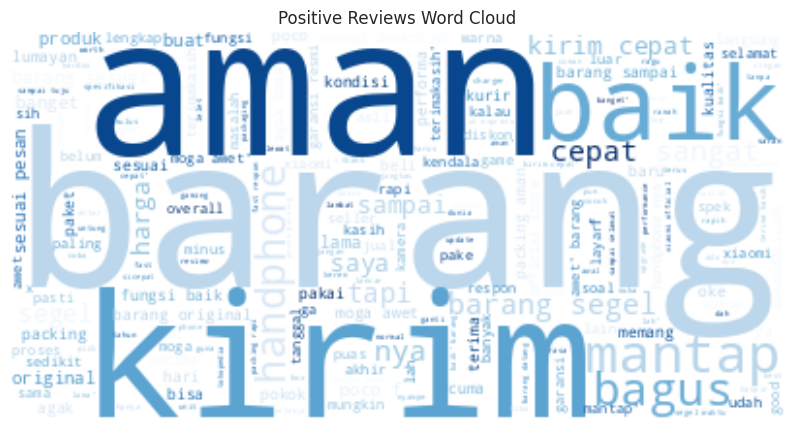

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

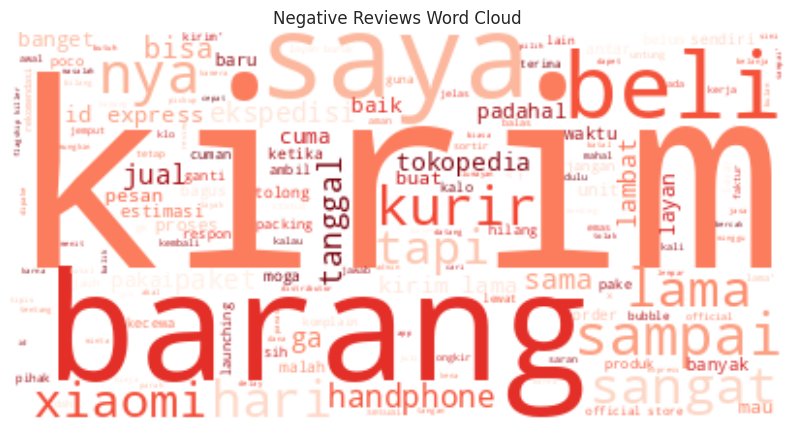

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

**FEATURE EKSTRACTION**

In [ ]:
# vektor tf-idf
X = df_wc[['Review_clean']]
y = df_wc['label']
print(X.shape)
print(y.shape)

(558, 1)
(558,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(390, 1)
(168, 1)
(390,)
(168,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)

# Fit dan transform data latih
tfidf_train = tfidf.fit_transform(X_train['Review_clean'])

# Transform data uji
tfidf_test = tfidf.transform(X_test['Review_clean'])

# Mengubah hasil transformasi menjadi DataFrame
tfidf_train_df = pd.DataFrame(tfidf_train.toarray())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray())

# Contoh untuk melihat hasil DataFrame
print(tfidf_train_df.head())


   0    1    2    3    4    5    6    7    8    9    ...  582  583  584  585  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   586  587  588  589  590       591  
0  0.0  0.0  0.0  0.0  0.0  0.000000  
1  0.0  0.0  0.0  0.0  0.0  0.000000  
2  0.0  0.0  0.0  0.0  0.0  0.000000  
3  0.0  0.0  0.0  0.0  0.0  0.000000  
4  0.0  0.0  0.0  0.0  0.0  0.306111  

[5 rows x 592 columns]


In [ ]:
# IMPORT MODUL YANG DIBUTUHKAN UNTUK CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        28
           1       0.84      1.00      0.91       140

    accuracy                           0.84       168
   macro avg       0.92      0.52      0.49       168
weighted avg       0.87      0.84      0.77       168



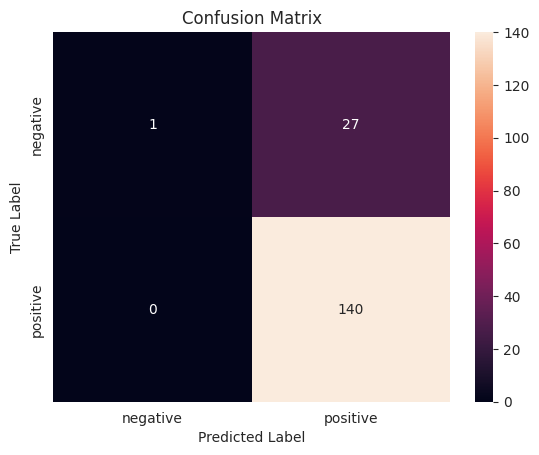

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)

# Fit dan transform data latih
tfidf_train = tfidf.fit_transform(X_train['Review_clean'])

# Transform data uji
tfidf_test = tfidf.transform(X_test['Review_clean'])

# Konversi hasil transformasi menjadi DataFrame
tfidf_train_df = pd.DataFrame(tfidf_train.toarray())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray())

# Inisialisasi dan latih model Naive Bayes
classifier = MultinomialNB()
classifier.fit(tfidf_train_df, y_train)

# Prediksi pada data uji
naive_bayes_pred = classifier.predict(tfidf_test_df)

# Tampilkan Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Tampilkan Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


DENGAN N GRAM

              precision    recall  f1-score   support

           0       0.75      0.54      0.62        28
           1       0.91      0.96      0.94       140

    accuracy                           0.89       168
   macro avg       0.83      0.75      0.78       168
weighted avg       0.89      0.89      0.89       168



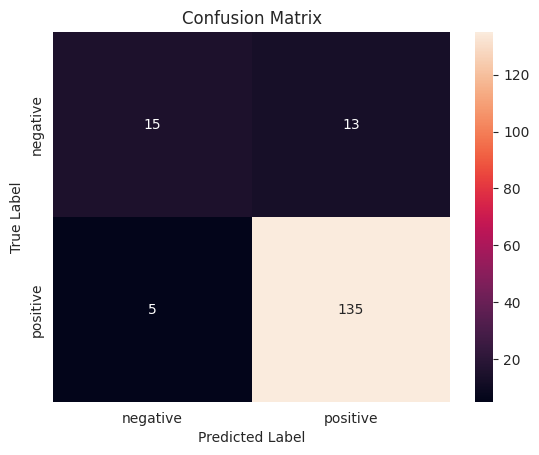

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi CountVectorizer dengan n-gram range
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=2)  # Menggunakan unigram dan bigram

# Fit dan transform data latih
ngram_train = ngram_vectorizer.fit_transform(X_train['Review_clean'])

# Transform data uji
ngram_test = ngram_vectorizer.transform(X_test['Review_clean'])

# Konversi hasil transformasi menjadi DataFrame
ngram_train_df = pd.DataFrame(ngram_train.toarray())
ngram_test_df = pd.DataFrame(ngram_test.toarray())

# Inisialisasi dan latih model Naive Bayes
classifier = MultinomialNB()
classifier.fit(ngram_train_df, y_train)

# Prediksi pada data uji
naive_bayes_pred = classifier.predict(ngram_test_df)

# Tampilkan Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Tampilkan Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
